In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
label_encoder = LabelEncoder()
scaler = StandardScaler()
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV


In [4]:
df = pd.read_csv("/content/drive/My Drive/XAI/XAI_Fairness/combinedataF1.csv")
df = df.drop(columns=['Unnamed: 0'])

In [8]:
df.head()

age  decile_score  priors_count  days_in_jail  c_days_from_compas  \
0   69             1             0           0.0                 1.0   
1   34             3             0          10.0                 1.0   
2   24             4             4           1.0                 1.0   
3   23             8             1           0.0                 1.0   
4   43             1             2           0.0                76.0   

   is_violent_recid  is_recid  Female-African-American  Female-Asian  \
0                 0         0                    False         False   
1                 1         1                    False         False   
2                 0         1                    False         False   
3                 0         0                    False         False   
4                 0         0                    False         False   

   Female-Caucasian  Female-Hispanic  Female-Native-American  Female-Other  \
0             False            False                   False         False   
1             False            False                   False         False   
2             False            False                   False         False   
3             False            False                   False         False   
4             False            False                   False         False   

   Male-African-American  Male-Asian  Male-Caucasian  Male-Hispanic  \
0                  False       False           False          False   
1                   True       False           False          False   
2                   True       False           False          False   
3                   True       False           False          False   
4                  False       False           False          False   

   Male-Native-American  Male-Other  
0                 False        True  
1                 False       False  
2                 False       False  
3                 False       False  
4                 False        True

In [5]:
# Calculate class distribution
class_distribution = df['is_recid'].value_counts(normalize=True) * 100
print("Class Distribution (%):\n", class_distribution)


Class Distribution (%):
 is_recid
0    51.885223
1    48.114777
Name: proportion, dtype: float64


In [6]:
filtered_df=df

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
filtered_df['Female-African-American'] = label_encoder.fit_transform(filtered_df['Female-African-American'])
filtered_df['Male-African-American'] = label_encoder.fit_transform(filtered_df['Male-African-American'])
filtered_df['Female-Caucasian'] = label_encoder.fit_transform(filtered_df['Female-Caucasian'])
filtered_df['Female-Asian'] = label_encoder.fit_transform(filtered_df['Female-Asian'])
filtered_df['Female-Native-American'] = label_encoder.fit_transform(filtered_df['Female-Native-American'])
filtered_df['Female-Other'] = label_encoder.fit_transform(filtered_df['Female-Other'])


filtered_df['Male-Caucasian'] = label_encoder.fit_transform(filtered_df['Male-Caucasian'])
filtered_df['Female-Hispanic'] = label_encoder.fit_transform(filtered_df['Female-Hispanic'])
filtered_df['Male-Hispanic'] = label_encoder.fit_transform(filtered_df['Male-Hispanic'])
filtered_df['Male-Asian'] = label_encoder.fit_transform(filtered_df['Male-Asian'])
filtered_df['Male-Native-American'] = label_encoder.fit_transform(filtered_df['Male-Native-American'])
filtered_df['Male-Other'] = label_encoder.fit_transform(filtered_df['Male-Other'])


In [8]:
X = filtered_df.drop(columns=['is_recid'])
Y = filtered_df['is_recid']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [10]:
filtered_df.head(3)

age  decile_score  priors_count  days_in_jail  c_days_from_compas  \
0   69             1             0           0.0                 1.0   
1   34             3             0          10.0                 1.0   
2   24             4             4           1.0                 1.0   

   is_violent_recid  is_recid  Female-African-American  Female-Asian  \
0                 0         0                        0             0   
1                 1         1                        0             0   
2                 0         1                        0             0   

   Female-Caucasian  Female-Hispanic  Female-Native-American  Female-Other  \
0                 0                0                       0             0   
1                 0                0                       0             0   
2                 0                0                       0             0   

   Male-African-American  Male-Asian  Male-Caucasian  Male-Hispanic  \
0                      0           0               0              0   
1                      1           0               0              0   
2                      1           0               0              0   

   Male-Native-American  Male-Other  
0                     0           1  
1                     0           0  
2                     0           0

#### I scaled numeric features but in the bagging method we don't need scaled data so in this part we don't use it

# Show Functions

In [11]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_learning_curves
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import plotly.express as px
import plotly.graph_objects as go
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score ,auc


In [12]:


from sklearn.metrics import roc_curve, auc

def calculateAUC(model):
    y_proba = model.predict_proba(X_test)  # Get predicted probabilities
    fpr, tpr, thresholds = roc_curve(Y_test, y_proba[:, 1])  # Calculate FPR and TPR
    roc_auc = auc(fpr, tpr)  # Calculate AUC
    print(f"AUC: {roc_auc:.4f}")  # Print the AUC value
    return roc_auc  # Return the AUC value


# BaggingEnsemble

In [17]:

base_model = DecisionTreeClassifier(random_state=0)
bagging_model = BaggingClassifier(
    estimator=base_model,
    random_state=42
)

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.8, 1.0],
    'estimator__max_depth': [2,4,5],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(bagging_model, param_distributions=param_grid, n_iter=10, cv=5, random_state=42, n_jobs=-1, verbose=1)
random_search.fit(X_train, Y_train)
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'n_estimators': 50, 'max_samples': 0.8, 'estimator__min_samples_split': 10, 'estimator__min_samples_leaf': 4, 'estimator__max_depth': 5}
Best score: 0.7301993442721346


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the base estimator with the best hyperparameters
base_model = DecisionTreeClassifier(
    random_state=0,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=4
)

# Configure the Bagging Classifier with the best hyperparameters
bagging_model = BaggingClassifier(
    estimator=base_model,
    n_estimators=50,  # Best value for number of base estimators
    max_samples=0.8,   # Best fraction of samples to draw for each base model
    random_state=50
)

bagging_model.fit(X_train, Y_train)

Y_pred = bagging_model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))


Accuracy: 0.7352737352737353
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.77       789
           1       0.73      0.67      0.70       654

    accuracy                           0.74      1443
   macro avg       0.73      0.73      0.73      1443
weighted avg       0.73      0.74      0.73      1443



### This is the feature importance of bagging algorithms that show us the importance of feature during the training

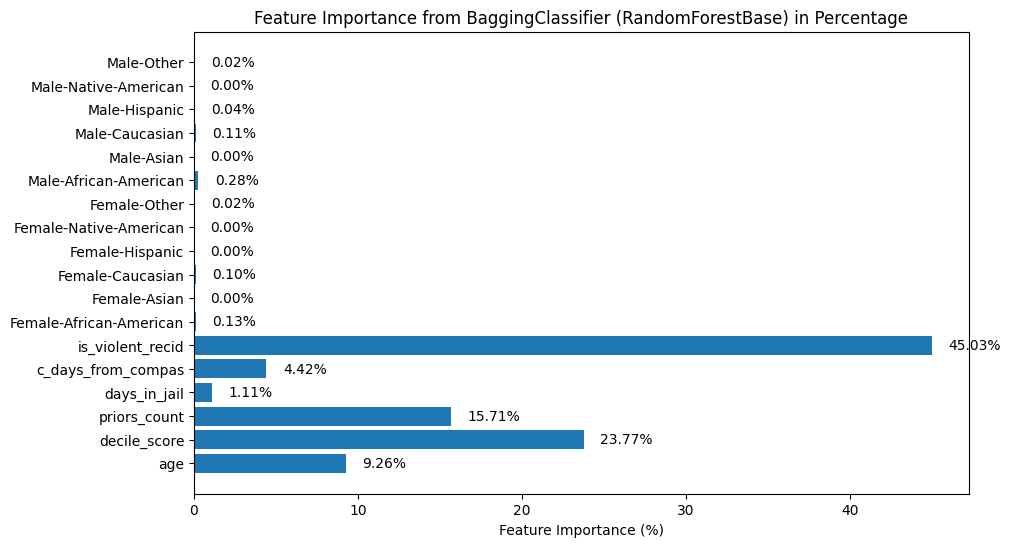

age: 9.26%
decile_score: 23.77%
priors_count: 15.71%
days_in_jail: 1.11%
c_days_from_compas: 4.42%
is_violent_recid: 45.03%
Female-African-American: 0.13%
Female-Asian: 0.00%
Female-Caucasian: 0.10%
Female-Hispanic: 0.00%
Female-Native-American: 0.00%
Female-Other: 0.02%
Male-African-American: 0.28%
Male-Asian: 0.00%
Male-Caucasian: 0.11%
Male-Hispanic: 0.04%
Male-Native-American: 0.00%
Male-Other: 0.02%


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Access the base models (RandomForestClassifiers) from the BaggingClassifier
base_models = bagging_model.estimators_

importances = np.zeros(X_train.shape[1])

# Iterate through each base model and accumulate the feature importances
for model in base_models:
    importances += model.feature_importances_

# Average the feature importances across all models
importances /= len(base_models)

importances_percent = 100 * importances / importances.sum()

feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

plt.figure(figsize=(10, 6))
bars = plt.barh(feature_names, importances_percent)
plt.xlabel("Feature Importance (%)")
plt.title("Feature Importance from BaggingClassifier (RandomForestBase) in Percentage")

# Annotate each bar with the percentage value
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', va='center')

plt.show()

for feature, importance in zip(feature_names, importances_percent):
    print(f"{feature}: {importance:.2f}%")


In [15]:
train_score111 = accuracy_score(Y_train, bagging_model.predict(X_train)) * 100

test_score111 = accuracy_score(Y_test, bagging_model.predict(X_test)) * 100
print(f'Test accuracy:{test_score111}\nTrain accuracy:{train_score111}' )

Test accuracy:73.52737352737353
Train accuracy:74.3025472188529


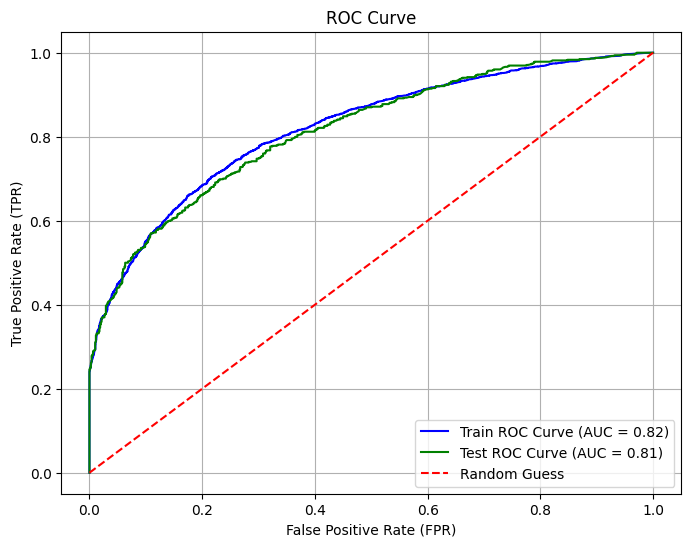

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Use predict_proba to get probabilities for the positive class
y_pred_train_prob = bagging_model.predict_proba(X_train)[:, 1]
y_pred_test_prob = bagging_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for train and test
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, y_pred_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, y_pred_test_prob)

auc_train = roc_auc_score(Y_train, y_pred_train_prob)
auc_test = roc_auc_score(Y_test, y_pred_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f"Train ROC Curve (AUC = {auc_train:.2f})")
plt.plot(fpr_test, tpr_test, color='green', label=f"Test ROC Curve (AUC = {auc_test:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()



In [17]:

calculateAUC(bagging_model)


AUC: 0.8146


0.8146358763270194

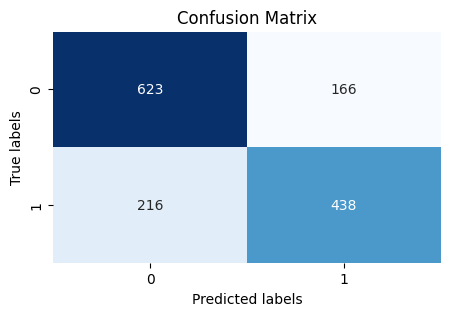

In [18]:
conf_matrix1 = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()



---



---
# 1.Shap


In [19]:
import shap

shap.initjs()

In [20]:
import shap

# Assuming `bagging_model` is your trained BaggingClassifier with RandomForest as the base estimator
explainer= shap.TreeExplainer(bagging_model.estimators_[0])  # Use only one of the estimators (RandomForestClassifier) for the explainer
shap_values = explainer(X_test)




# Attention

# ** Use first instance from X_test for both shap and lime to compare

In [21]:
X_test[:1]


age  decile_score  priors_count  days_in_jail  c_days_from_compas  \
308   62             1             0           1.0                 0.0   

     is_violent_recid  Female-African-American  Female-Asian  \
308                 0                        0             0   

     Female-Caucasian  Female-Hispanic  Female-Native-American  Female-Other  \
308                 0                0                       0             0   

     Male-African-American  Male-Asian  Male-Caucasian  Male-Hispanic  \
308                      0           0               1              0   

     Male-Native-American  Male-Other  
308                     0           0

In [22]:
Y_test[:1]


308    0
Name: is_recid, dtype: int64

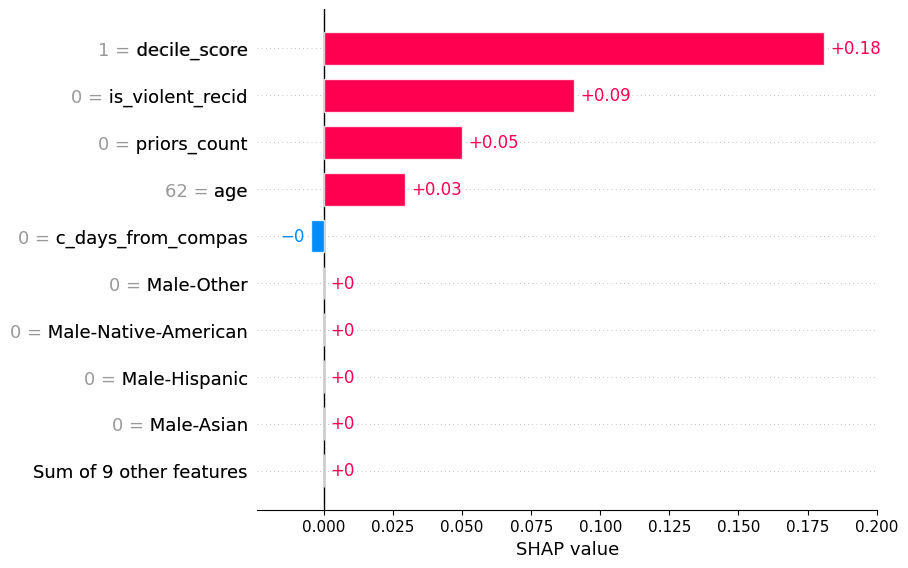

In [27]:

# Now plot the waterfall chart for the first instance
shap.plots.bar(shap_values[0, :, 0])  # First instance, first class




---
### The table for shape value for class 0


In [28]:
import shap
import pandas as pd
#Shap value
shap_values_class_0 = shap_values.values[:, :, 0]  # For the first class

# Convert SHAP values for class 0 to a pandas DataFrame
shap_table = pd.DataFrame(
    shap_values_class_0,
    columns=X_test.columns,  # Use feature names from X_test
    index=X_test.index       # Use the index from X_test
)

# Add base values (optional)
shap_table['Base Value'] = shap_values.base_values[:, 0]  # Base value for class 0
shap_table['SHAP Prediction'] = shap_table.sum(axis=1) + shap_table['Base Value']


In [29]:
shap_table.head()

age  decile_score  priors_count  days_in_jail  c_days_from_compas  \
308   0.029278      0.180828      0.050052           0.0           -0.004617   
381   0.017803      0.025714      0.103346           0.0           -0.003308   
3238  0.068171      0.067894     -0.090542           0.0           -0.007175   
2312 -0.221354     -0.113753      0.048637           0.0           -0.014571   
251   0.029278      0.180828      0.050052           0.0           -0.004617   

      is_violent_recid  Female-African-American  Female-Asian  \
308           0.090542                      0.0           0.0   
381           0.079579                      0.0           0.0   
3238          0.071958                      0.0           0.0   
2312          0.051211                      0.0           0.0   
251           0.090542                      0.0           0.0   

      Female-Caucasian  Female-Hispanic  Female-Native-American  Female-Other  \
308                0.0              0.0                     0.0           0.0   
381                0.0              0.0                     0.0           0.0   
3238               0.0              0.0                     0.0           0.0   
2312               0.0              0.0                     0.0           0.0   
251                0.0              0.0                     0.0           0.0   

      Male-African-American  Male-Asian  Male-Caucasian  Male-Hispanic  \
308                     0.0         0.0             0.0            0.0   
381                     0.0         0.0             0.0            0.0   
3238                    0.0         0.0             0.0            0.0   
2312                    0.0         0.0             0.0            0.0   
251                     0.0         0.0             0.0            0.0   

      Male-Native-American  Male-Other  Base Value  SHAP Prediction  
308                    0.0         0.0    0.502166         1.350415  
381                    0.0         0.0    0.502166         1.227468  
3238                   0.0         0.0    0.502166         1.114639  
2312                   0.0         0.0    0.502166         0.754503  
251                    0.0         0.0    0.502166         1.350415



---
### The table for shape value for class 1



In [30]:
import shap
import pandas as pd
#Shap value
shap_values_class_1 = shap_values.values[:, :, 1]  # For the first class

# Convert SHAP values for class 0 to a pandas DataFrame
shap_table1 = pd.DataFrame(
    shap_values_class_1,
    columns=X_test.columns,  # Use feature names from X_test
    index=X_test.index       # Use the index from X_test
)

# Add base values (optional)
shap_table1['Base Value'] = shap_values.base_values[:, 0]  # Base value for class 0
shap_table1['SHAP Prediction'] = shap_table1.sum(axis=1) + shap_table1['Base Value']



In [31]:
shap_table1.head()

age  decile_score  priors_count  days_in_jail  c_days_from_compas  \
308  -0.029278     -0.180828     -0.050052           0.0            0.004617   
381  -0.017803     -0.025714     -0.103346           0.0            0.003308   
3238 -0.068171     -0.067894      0.090542           0.0            0.007175   
2312  0.221354      0.113753     -0.048637           0.0            0.014571   
251  -0.029278     -0.180828     -0.050052           0.0            0.004617   

      is_violent_recid  Female-African-American  Female-Asian  \
308          -0.090542                      0.0           0.0   
381          -0.079579                      0.0           0.0   
3238         -0.071958                      0.0           0.0   
2312         -0.051211                      0.0           0.0   
251          -0.090542                      0.0           0.0   

      Female-Caucasian  Female-Hispanic  Female-Native-American  Female-Other  \
308                0.0              0.0                     0.0           0.0   
381                0.0              0.0                     0.0           0.0   
3238               0.0              0.0                     0.0           0.0   
2312               0.0              0.0                     0.0           0.0   
251                0.0              0.0                     0.0           0.0   

      Male-African-American  Male-Asian  Male-Caucasian  Male-Hispanic  \
308                     0.0         0.0             0.0            0.0   
381                     0.0         0.0             0.0            0.0   
3238                    0.0         0.0             0.0            0.0   
2312                    0.0         0.0             0.0            0.0   
251                     0.0         0.0             0.0            0.0   

      Male-Native-American  Male-Other  Base Value  SHAP Prediction  
308                    0.0         0.0    0.502166         0.658250  
381                    0.0         0.0    0.502166         0.781198  
3238                   0.0         0.0    0.502166         0.894027  
2312                   0.0         0.0    0.502166         1.254163  
251                    0.0         0.0    0.502166         0.658250

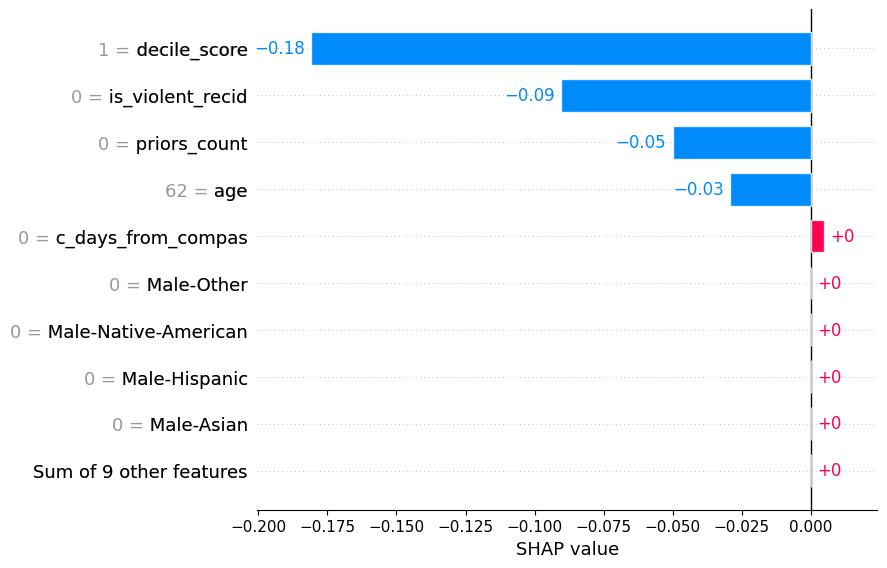

In [32]:
shap.plots.bar(shap_values[0, :, 1])  # First instance, second class


### Lime

In [ ]:
! pip install lime

In [34]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np


In [35]:
# Initialize LIME Explainer with numeric class names (0 and 1)
explainer = LimeTabularExplainer(
    training_data=X_train.values,   # Use training data
    feature_names=X_train.columns,  # Feature names
    class_names=[0, 1],             # Numeric class names
    mode='classification'           # Mode of the model
)


In [36]:
X_train.columns

Index(['age', 'decile_score', 'priors_count', 'days_in_jail',
       'c_days_from_compas', 'is_violent_recid', 'Female-African-American',
       'Female-Asian', 'Female-Caucasian', 'Female-Hispanic',
       'Female-Native-American', 'Female-Other', 'Male-African-American',
       'Male-Asian', 'Male-Caucasian', 'Male-Hispanic', 'Male-Native-American',
       'Male-Other'],
      dtype='object')

In [37]:
# Select a sample to explain (e.g., the first instance in the test set)
sample_index = 0
sample = X_test.iloc[sample_index].values

# Explain the prediction for the selected instance
explanation = explainer.explain_instance(
    data_row=sample,                # The instance to explain
    predict_fn=bagging_model.predict_proba  # The prediction function of your model
)

# Display explanation
explanation.show_in_notebook(show_table=True)


In [38]:
lime_values = explanation.as_list()
lime_table = pd.DataFrame(lime_values, columns=['Feature', 'Contribution'])

# Display the table
print(lime_table)

                        Feature  Contribution
0      is_violent_recid <= 0.00     -0.580147
1          priors_count <= 0.00     -0.134976
2          decile_score <= 2.00     -0.098347
3    c_days_from_compas <= 1.00      0.090091
4                   age > 43.00     -0.062426
5  Male-Native-American <= 0.00      0.032532
6            Male-Asian <= 0.00     -0.020980
7   0.00 < days_in_jail <= 1.00     -0.011882
8            Male-Other <= 0.00     -0.011143
9       Female-Hispanic <= 0.00     -0.008948


In [39]:
# Select a sample to explain (e.g., the first instance in the test set)
sample_index = 1
sample = X_test.iloc[sample_index].values

# Explain the prediction for the selected instance
explanation = explainer.explain_instance(
    data_row=sample,                # The instance to explain
    predict_fn=bagging_model.predict_proba  # The prediction function of your model
)

# Display explanation
explanation.show_in_notebook(show_table=True)




---



---



---



### 3.Permutation Feature Importance




In [40]:
from sklearn.inspection import permutation_importance


In [41]:
import pandas as pd
from sklearn.inspection import permutation_importance

# Assuming xgb_model is the trained model and X_test, Y_test are your test data
result = permutation_importance(bagging_model, X_test, Y_test, n_repeats=10, random_state=42)

# Create a DataFrame to display the results with feature names
importance_df = pd.DataFrame({
    'Feature': X_test.columns,  # Feature names
    'Importance': result.importances_mean  # Mean permutation importance
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the table
print(importance_df)


                    Feature  Importance
2              priors_count    0.085031
5          is_violent_recid    0.070547
0                       age    0.019889
1              decile_score    0.018850
4        c_days_from_compas    0.003742
8          Female-Caucasian    0.000139
9           Female-Hispanic    0.000000
7              Female-Asian    0.000000
13               Male-Asian    0.000000
10   Female-Native-American    0.000000
17               Male-Other    0.000000
15            Male-Hispanic    0.000000
16     Male-Native-American    0.000000
11             Female-Other   -0.000069
12    Male-African-American   -0.000347
14           Male-Caucasian   -0.000347
6   Female-African-American   -0.001594
3              days_in_jail   -0.002564




---



---



---



### 4. Accumulated Local Effects (ALE)

In [ ]:
! pip install alibi

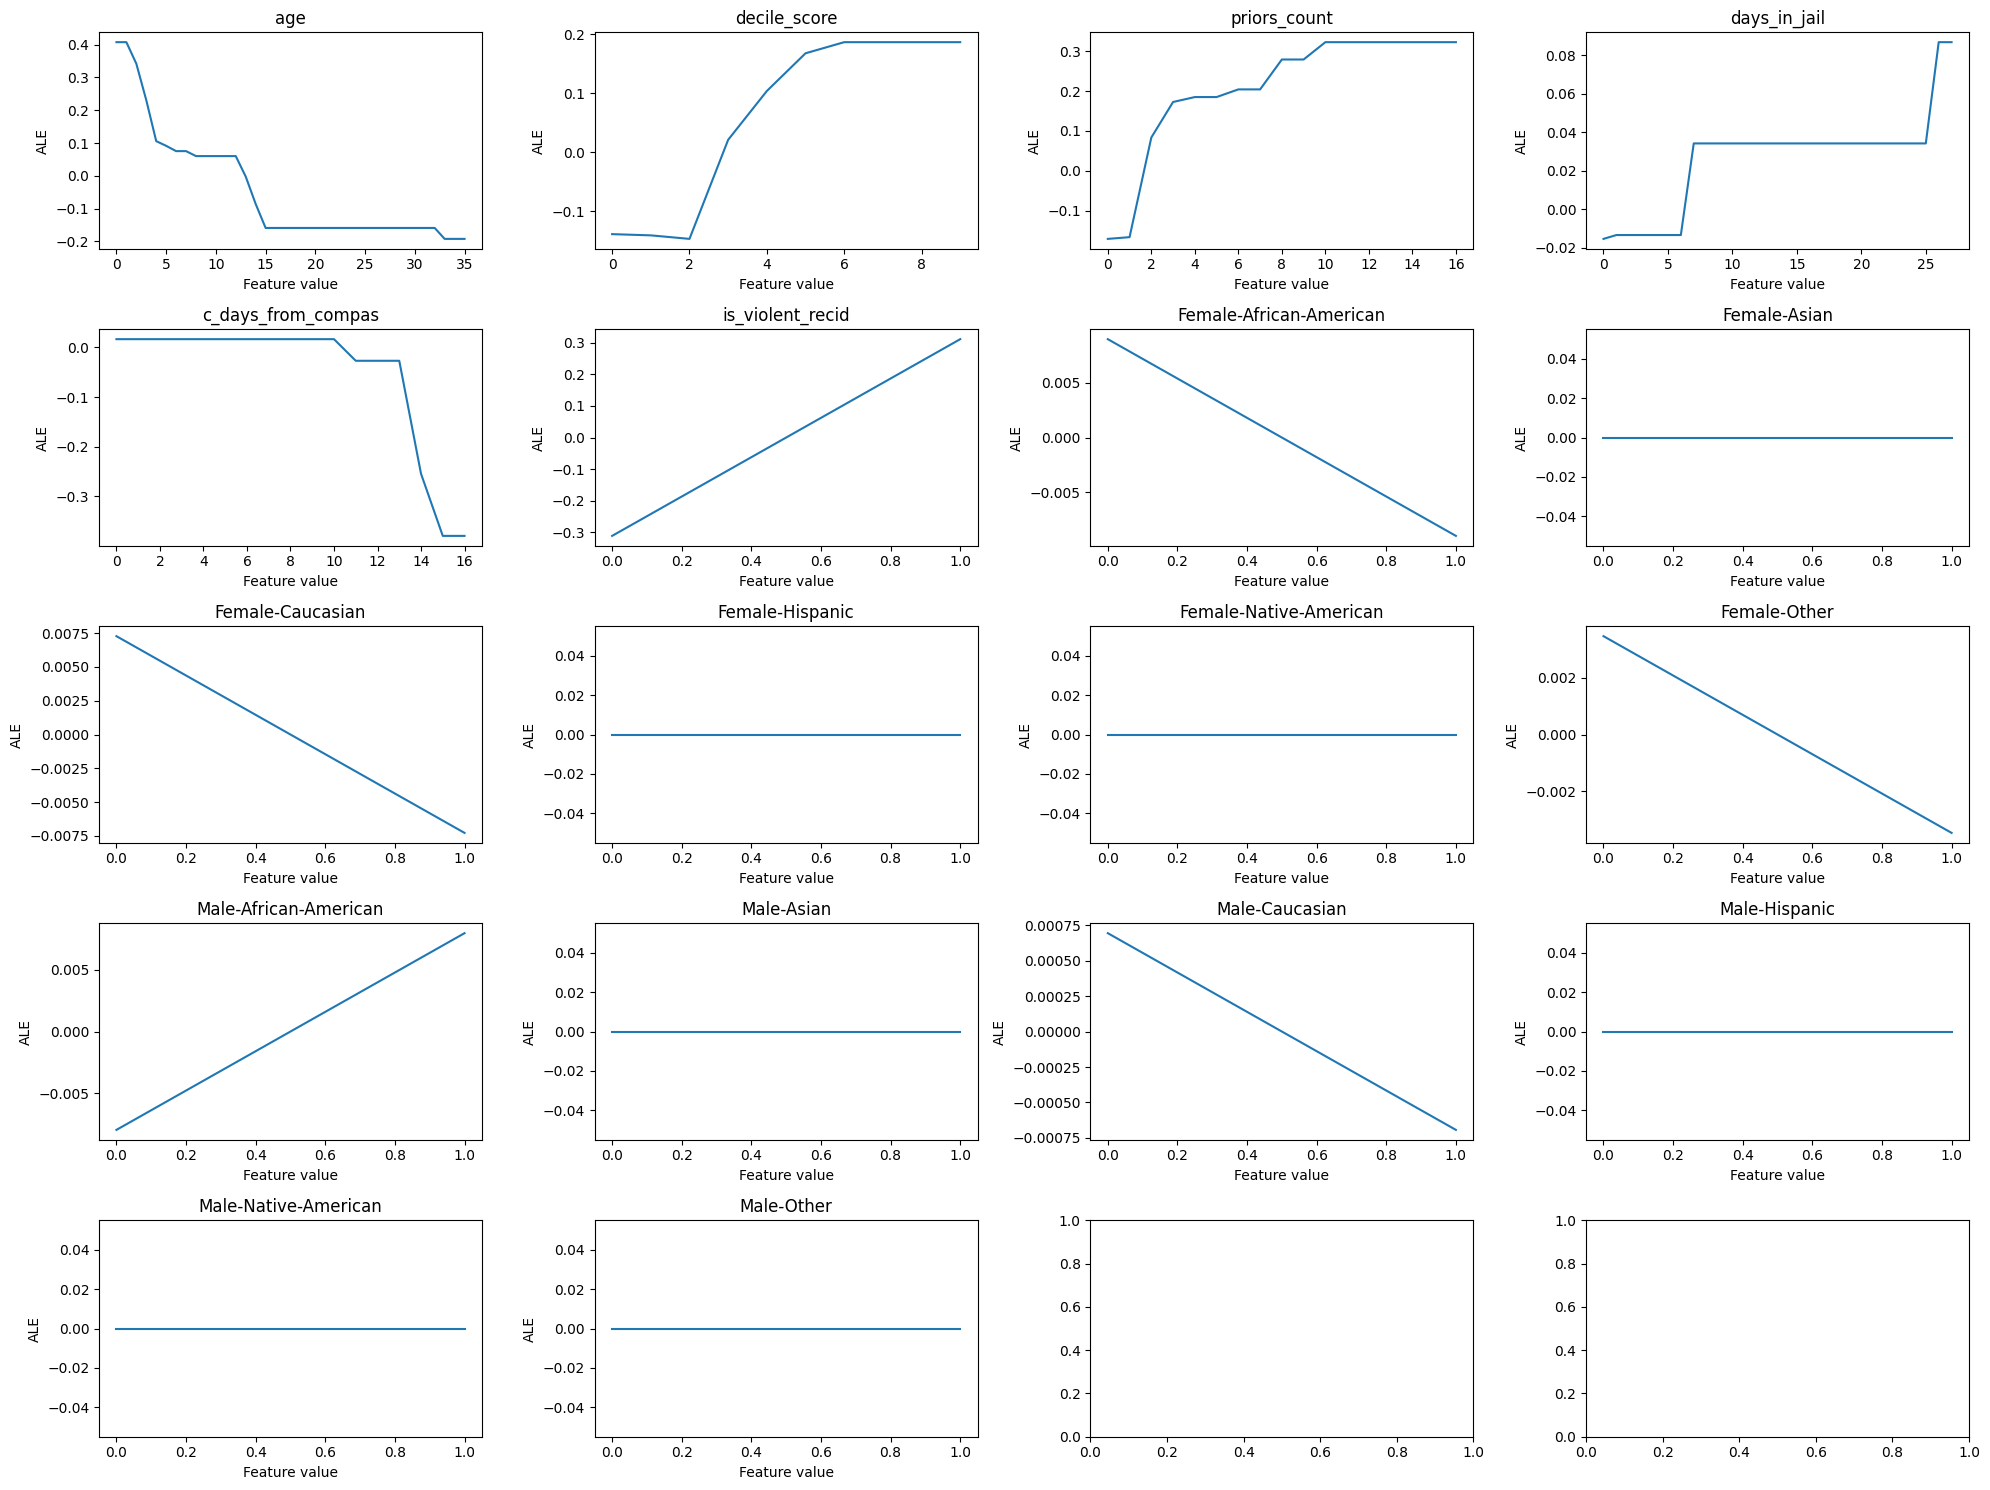

In [25]:
from alibi.explainers import ALE
import matplotlib.pyplot as plt

ale = ALE(bagging_model.predict, feature_names=X.columns.tolist())

ale_exp = ale.explain(X_test.values)

fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
for i, axi in enumerate(ax.flat):
    if i < len(X.columns):
        axi.plot(ale_exp.ale_values[i])
        axi.set_title(X_test.columns[i])
        axi.set_xlabel('Feature value')
        axi.set_ylabel('ALE')
plt.tight_layout()
plt.show()


In [26]:
ale_scores = ale_exp.ale_values

# Print the ALE scores for each feature in the test data
for i, feature_name in enumerate(X.columns):
    print(f"ALE scores for feature '{feature_name}': {ale_scores[i]}")

ALE scores for feature 'age': [[ 0.40747194]
 [ 0.40747194]
 [ 0.34189817]
 [ 0.23078706]
 [ 0.10578706]
 [ 0.09150135]
 [ 0.07537232]
 [ 0.07537232]
 [ 0.0602208 ]
 [ 0.0602208 ]
 [ 0.0602208 ]
 [ 0.0602208 ]
 [ 0.0602208 ]
 [-0.0022792 ]
 [-0.08561253]
 [-0.15878326]
 [-0.15878326]
 [-0.15878326]
 [-0.15878326]
 [-0.15878326]
 [-0.15878326]
 [-0.15878326]
 [-0.15878326]
 [-0.15878326]
 [-0.15878326]
 [-0.15878326]
 [-0.15878326]
 [-0.15878326]
 [-0.15878326]
 [-0.15878326]
 [-0.15878326]
 [-0.15878326]
 [-0.15878326]
 [-0.1921166 ]
 [-0.1921166 ]
 [-0.1921166 ]]
ALE scores for feature 'decile_score': [[-0.13873268]
 [-0.14078186]
 [-0.14676989]
 [ 0.02129734]
 [ 0.10405596]
 [ 0.16805596]
 [ 0.18692388]
 [ 0.18692388]
 [ 0.18692388]
 [ 0.18692388]]
ALE scores for feature 'priors_count': [[-0.1708312 ]
 [-0.1665022 ]
 [ 0.0834978 ]
 [ 0.17260671]
 [ 0.18495239]
 [ 0.18495239]
 [ 0.20418316]
 [ 0.20418316]
 [ 0.27918316]
 [ 0.27918316]
 [ 0.32266142]
 [ 0.32266142]
 [ 0.32266142]
 [ 0.